210 7
Epoch 1
quantization_error= 1.7366
Epoch 2
quantization_error= 1.6480
Epoch 3
quantization_error= 1.4860
Epoch 4
quantization_error= 1.4196


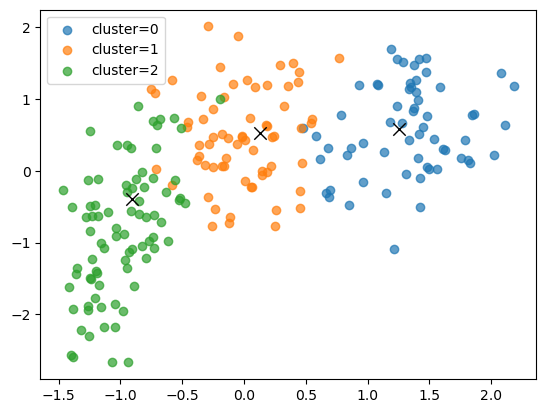

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SOM import train_SOM,feature_normalization,get_U_Matrix,get_winner_index,weights_PCA
from collections import defaultdict, Counter
if __name__ == "__main__":
    
    # seed 数据展示
    columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
    data = pd.read_csv('seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
    labs = data['target'].values
    label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
    datas = data[data.columns[:-1]].values
    N,D = np.shape(datas)
    print(N,D)
    
    # 对训练数据进行正则化处理
    datas = feature_normalization(datas)
    
    # SOM的训练
    X=3
    Y=1
    weights = train_SOM(X=X,Y=Y,N_epoch=4,datas=datas,sigma=1.5,init_weight_fun=weights_PCA)
    
    # 实现聚类
    
    # 获取聚类的编号
    index_clusters = []
    for i in range(N):
        x = datas[i]
        winner = get_winner_index(x,weights)
        index_clusters.append(winner[0]*Y+winner[1])
    
    
    for c in np.unique(index_clusters):
        
        ii = np.where(index_clusters==c)[0]
        
        plt.scatter(datas[ii, 0],
                    datas[ii, 2], label='cluster='+str(c), alpha=.7)
    plt.legend()                
    for i in range(X):
        for j in range(Y):
            plt.scatter(weights[i,j,0], weights[i,j,2], marker='x', 
                s=80, linewidths=1, color='k')
    plt.legend()
    plt.show()

    
    
    
    